In [3]:
import pandas as pd
from numpy import isnan
import seaborn as sns
import os
 
# Credenciales aqui:
os.environ['KAGGLE_USERNAME'] = "juanmg0511" #BORRAR CUANDO SE TERMINE DE USAR!!!
os.environ['KAGGLE_KEY'] = "*" #BORRAR CUANDO SE TERMINE DE USAR!!!

In [4]:
sns.set(rc = {'figure.figsize':(20,5)})

# Aca podes subir al colab o usar tus credenciales arriba para cargar la data

In [5]:
# OPCION CARGAR LA DATA DESDE KAGGLE PONIENDO CREDENCIALES (no olvidarse de quitarlas antes de irse)

!kaggle competitions leaderboard --download nlp-getting-started
!unzip nlp-getting-started.zip -d leaderboard
leaderboard = pd.read_csv("leaderboard/nlp-getting-started-publicleaderboard.csv")

100%|███████████████████████████████████████| 58.2k/58.2k [00:00<00:00, 567kB/s]
100%|███████████████████████████████████████| 58.2k/58.2k [00:00<00:00, 564kB/s]
Archive:  nlp-getting-started.zip
  inflating: leaderboard/nlp-getting-started-publicleaderboard.csv  


# AGREGA TU NOMBRE DE GRUPO ACA (si queres)

In [6]:
# En nombre_en_kaggle se agregan los grupos que no pudieron ser encontrados en piazza
# y que a ojo se encontraron en kaggle

nombre_en_kaggle = [
    'COVIDATOS' ,
    'fiuba_barros_gomez', 
    'Data Science Monsters',
]

In [7]:
piazza = [
 'King Data',
 'How i met your data',
 'Datavid-19',
 'Coronapandas',
 'El tío del marido de Pampita',
 'El cuarteto imperial',
 'Equipo Cloud',
 'Superficial Intelligence',
 'DataDevs',
 'The Datalorian',
 'Corona2',
 'Les chiques super poderoses',
 'CuarenData 2.0',
 'Pyrañas',
 'Grupo Phyton Fiuba',
 'Grupo rosa',
 'DATAVID-20',
 'Grupo con barbijo',
 'Grupo 13',
 'AlphaZero',
 'undefined',
 'Barbijo De Uranio',
 'COVIgData -19',
 'ChocoTeam',
 'El Cuarteto del Code',
 'DatUs',
 'covidatos',
 'Grupo Orga Datos',
 'DataSOS',
 'DataTravellers',
 'CoronaDatos',
 'Data hunters',
 'DTS: DaTa Science',
 'Rest Driven Development',
 'Unidos por los datos',
 'Here we go again',
 'Undefined',
 'Los últimos',
 'Team_Undav',
 'DelLejanoOeste',
 'Kung Fu Panda',
 'Grupo - AVV',
 'El Jabalí Salvaje',
 'Oyentes en cuarentena 2020.',
 'Los Oyentes 700',
 'Oh La La, Data',
 'Belu +3',
 'Grupo Random',
 'DATA',
 'El gato de Turing',
 'ECONOSDATA',
 'marte',
 'Los aprendices de Oogway',
 'GMC',
 'Zumba',
 'Datos al alcance',
 'Reykjavik',
 'Reinventadas',
 '3Sigma',
 'Grupo Rocket Cósmico',
 'NameError',
 'Daiana Vega']

# Funciones

In [8]:
def seParecen(g,l,threshold):
    
    l = str(l)
    g = str(g)
    
    if len(g) > len(l):
        smaller = l
        larger = g
    else:
        smaller = g
        larger = l
        
    count = 0
    for i in range(len(smaller)):
        if g[i] == l[i]:
            count += 1
    
    return count/len(larger) >= threshold or smaller in larger

# Encontrando grupos que tienen un nombre parecido en kaggle a los de piazza

    Esto se podria comentar por completo si tenemos el nombre exacto de cada grupo. De ser ese el caso se podria solucionar facil el filtrado con un simple merge

In [9]:
g_id = { g:i for i,g in enumerate(piazza)}
l_id = { l:i for i,l in enumerate(leaderboard['TeamName'].values)}

parecidos = {}
asignados = {}
for g in piazza:
    for l in list(leaderboard['TeamName'].values):
        
        if not (type(g) == type('') and type(l) == type('')):
            continue
            
        if seParecen(g,l,0.7):
            if not l in asignados:
                asignados[l] = g
                parecidos[g] = l
            
fuera = []
for g in g_id:
    if not g in parecidos:
        fuera.append(g)
        
for g in fuera:
    for l in list(leaderboard['TeamName'].values):
        
        if not (type(g) == type('') and type(l) == type('')):
            continue
            
        if seParecen(g,l,0.5):
            if not l in asignados:
                asignados[l] = g
                parecidos[g] = l
            
fuera = []
for g in g_id:
    if not g in parecidos:
        fuera.append(g)

# Filtrando

In [10]:
cross = leaderboard[leaderboard['TeamName'].isin(list(parecidos.values()) + piazza + nombre_en_kaggle)]

# Leaderboard Orga de Datos

In [11]:
datos_leaderboard = cross.groupby('TeamName')['SubmissionDate'].max().to_frame().merge(cross, on = 'SubmissionDate')\
    .sort_values('Score', ascending = False).reset_index()[['TeamName','Score']]

teamName = 'Grupo 33 - DataTravellers' #pone tu grupo

your_team_score = datos_leaderboard[datos_leaderboard['TeamName'] == teamName]['Score'].values[0]
datos_leaderboard['relative'] = (datos_leaderboard['Score'] - your_team_score) * 100

datos_leaderboard

,TeamName,Score,relative
0,Superficial Intelligence,0.84216,5.026
1,marbel,0.83971,4.781
2,COVIgData-19,0.83879,4.689
3,Grupo python fiuba,0.83879,4.689
4,Corona2,0.83604,4.414
5,DatUs,0.83113,3.923
6,El Cuarteto Imperial,0.82868,3.678
7,COVIDATOS,0.82715,3.525
8,El tio del marido de Pampita,0.82562,3.372
9,Grupo Orga Datos,0.82562,3.372


# Podes ver el progreso de el team que quieras

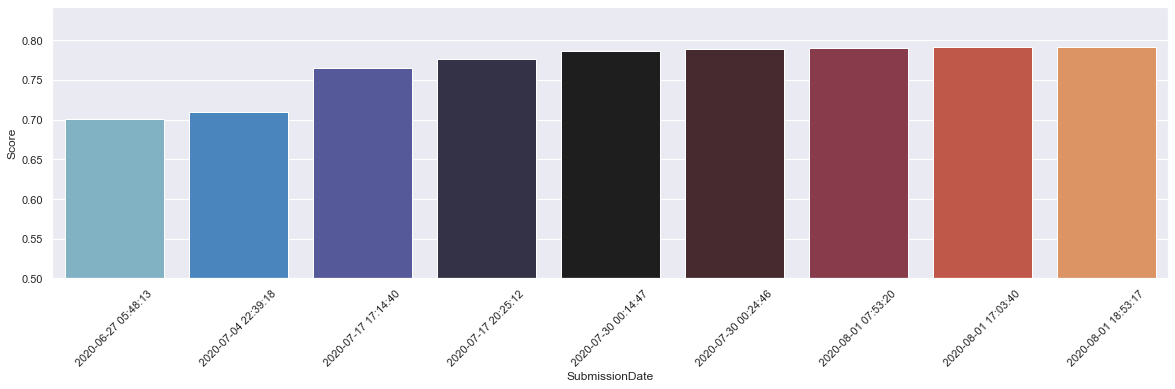

In [12]:
teamName = 'Grupo 33 - DataTravellers' #pone tu grupo

v = sns.barplot(x = 'SubmissionDate', y = 'Score', data = leaderboard[ leaderboard['TeamName'] == teamName ], palette = 'icefire')
v.set(ylim=(0.5, datos_leaderboard['Score'].max()))
for item in v.get_xticklabels():
        item.set_rotation(45)

# Cantidad de sumbits que significaron un nuevo record

In [13]:
cross.groupby('TeamName')['SubmissionDate'].count().sort_values(ascending = False)

TeamName
DatUs                           23
Unidos por los datos            18
The Datalorian                  16
El Cuarteto Imperial            15
Superficial Intelligence        12
Grupo 1 - King Data             12
El Cuarteto del Code            11
Grupo Orga Datos                10
El tio del marido de Pampita     9
Grupo 33 - DataTravellers        9
COVIgData-19                     8
Corona2                          8
Grupo 13                         8
COVIDATOS                        8
Barbijo de Uranio                8
Datastic                         8
Alpha Zero                       8
Datavid-19                       7
Grupo python fiuba               6
Grupo Rosa                       6
fiuba_barros_gomez               6
DataSOS                          5
Mayank Desai                     4
Pyrañas                          4
ChocoTeam                        4
Data Hunters                     4
marbel                           3
Data Science Monsters            3
Kung Fu Pan